In [1]:
import pandas as pd
import yfinance as yf

Getting data from Yahoo Finance

In [2]:
df_yahoo = yf.download('AAPL',
                       start = '2000-01-01',
                       end = '2010-12-31',
                       progress = 'False')
df_yahoo.head(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
2000-01-04 00:00:00-05:00,0.966518,0.987723,0.903460,0.915179,0.781409,512377600


To get adjusted prices only, you can set "auto_adjust = True".
To get data for more tickers, you just pass a list of multiple tickers.

Converting prices to returns.

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

df = yf.download('AAPL',
                start = '2000-01-01',
                end = '2010-12-31',
                progress = False)

df = df.loc[:,['Adj Close']]
df.rename(columns = {'Adj Close':'adj_close'}, inplace = True)

df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

df.head(2)

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03 00:00:00-05:00,0.853355,NaN,NaN
2000-01-04 00:00:00-05:00,0.781409,-0.08431,-0.088077


Changing frequency

<IPython.core.display.Javascript object>

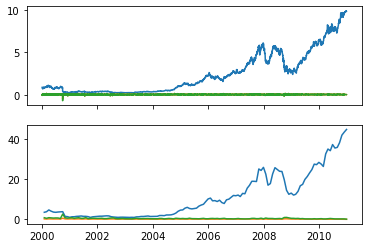

In [4]:
import pandas as pd
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

df_rv = df.groupby(pd.Grouper(freq = 'M')).apply(realized_volatility)
df_rv.rename(columns = {'log_rtn': 'rv'}, inplace = True)

df_rv.rv = df_rv.rv * np.sqrt(12)

fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].plot(df)
ax[1].plot(df_rv)